In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from importlib import reload
from IPython.display import clear_output

import poppy
print(poppy.accel_math._NUMEXPR_AVAILABLE)
print(poppy.accel_math._MKLFFT_AVAILABLE)
print(poppy.accel_math._FFTW_AVAILABLE)
print(poppy.accel_math._CUDA_AVAILABLE)
print(poppy.accel_math._OPENCL_AVAILABLE)

# poppy.conf.use_numexpr = True
# poppy.conf.use_fftw = False
# poppy.conf.use_mkl = True
# poppy.conf.use_cuda = False
# poppy.conf.use_opencl = False

import misc
import poppy_roman_cgi_phasec as cgi
from poppy_roman_cgi_phasec import spc
reload(spc)

# set debugging mode for more information from POPPY as propagation is performed
import logging, sys
_log = logging.getLogger('poppy')
_log.setLevel("DEBUG")
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# cgi_dir = Path('C:/Users/Kian/Desktop/roman-cgi-phasec-data')
# cgi_dir = Path('/Users/kianmilani/Desktop/roman-cgi-phasec-data')
cgi_dir = Path('/groups/douglase/kians-data-files/roman-cgi-phasec-data')
wf_dir = Path('/groups/douglase/kians-data-files/roman-cgi-wfs/spc-spec')

def save_waves(wfs, wf_dir, npix=1024, use_opds=False):
    optics = ['polmap', 'primary', 'secondary', 'poma_fold', 'm3', 'm4', 'm5', 'tt_fold', 'fsm', 'oap1', 
              'focm', 'oap2', 'dm1', 'dm2', 'oap3', 'fold3', 'oap4', 'pupilmask', 'oap5', 'fpm', 'oap6',
              'lyotstop', 'oap7', 'fieldstop', 'oap8', 'filter', 
              'imaging_lens_lens1', 'imaging_lens_lens2', 'fold4', 'image']
    print('Saving wavefronts: ')
    save_with_opds = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 
                      1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 
                      1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
    count = 0
    for i,wf in enumerate(wfs):
        if use_opds and save_with_opds[i]==0: 
            continue
        wavefront = misc.pad_or_crop(wf.wavefront, npix)

        wf_data = np.zeros(shape=(2,npix,npix))
        wf_data[0,:,:] = np.abs(wavefront)**2
        wf_data[1,:,:] = np.angle(wavefront)

        wf_fpath = wf_dir/(optics[count] + '_poppy.fits')
        hdr = fits.Header()
        hdr['PIXELSCL'] = wf.pixelscale.value

        wf_hdu = fits.PrimaryHDU(wf_data, header=hdr)
        wf_hdu.writeto(wf_fpath, overwrite=True)
        print(count, 'Saved '+optics[count]+' wavefront to ' + str(wf_fpath))
        count+=1

True
True
False
False
False


Propagating wavelength 730.000 nm.
DEBUG:poppy:Trans: /groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-spec/pupil_SPC-20200617_1000.fits
DEBUG:poppy:OPD: None
INFO:poppy:Roman Pupil: Loaded amplitude transmission from /groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-spec/pupil_SPC-20200617_1000.fits
DEBUG:poppy:Trans: /groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-spec/SPM_SPC-20200617_1000_rounded9_rotated.fits
DEBUG:poppy:OPD: None
INFO:poppy:SPM: Loaded amplitude transmission from /groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-spec/SPM_SPC-20200617_1000_rounded9_rotated.fits
DEBUG:poppy:Trans: /groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-spec/fpm_0.05lamD.fits
DEBUG:poppy:OPD: None
INFO:poppy:FPM: Loaded amplitude transmission from /groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-spec/fpm_0.05lamD.fits
DEBUG:poppy:FixedSamplingImagePlaneElement FPM initialized:centering style ADJUSTABLE, central wavelength for

DEBUG:poppy:Output beam focal length is now 18.371089143344314 m
DEBUG:poppy:Spherical to Spherical wavefront propagation.
DEBUG:poppy:1/fl=-1.5286e+00 1 / m
DEBUG:poppy:1.0/(R_input_beam)=-1.8079e+00 1 / m
DEBUG:poppy:1.0/(self.z-self.z_w0)=-2.7931e-01 1 / m
DEBUG:poppy:Applying spherical phase curvature =1.72e+10 m
DEBUG:poppy:Applying spherical lens phase =5.81e-11 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Secondary
DEBUG:poppy:------ Optic: Secondary applied ------
DEBUG:poppy:  Propagating wavefront to Optic: POMA_Fold after distance 2.993753469304728 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 5.865339731941776 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 0.0004605276918290784 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=3.580189223831741 m
DEBUG:poppy:using mkl_fft FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.098459 s, full function  in 0.

DEBUG:poppy:------ Applying Lens: M5 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.296e-06 m, z_w0=8.134e+00 m
z=8.333e+00 m, z_r=2.270e-05 m
DEBUG:poppy:  Beam radius at M5 =2.01e-02 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:2.296e-06 m, z_w0=8.134e+00 m
z=8.333e+00 m, z_r=2.270e-05 m
DEBUG:poppy: input curved wavefront and M5 has output beam curvature of =-4.26e+06 m
DEBUG:poppy:M5 has a curvature of =-4.26e+06 m
DEBUG:poppy:M5 has a curved output wavefront, with waist at 9.044489896333591 m
DEBUG:poppy:Post Optic Parameters:w_0:2.012e-02 m, z_w0=9.044e+00 m
z=8.333e+00 m, z_r=1.742e+03 m
DEBUG:poppy:Magnification: -21429431.691468988  from R_in = 0.19882152545972254 m, R_out = -4260632.298632787 m
DEBUG:poppy:Output beam focal length is now -250239168.71772203 m
DEBUG:poppy:Spherical to Planar.
DEBUG:poppy:Applying spherical phase curvature =-5.91e+06 m
DEBUG:poppy:Applying spherical lens phase =-1.69e-07 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: M5
DEBUG:popp

DEBUG:poppy:    FFT_2D: FFT in 0.097764 s, full function  in 0.105 s
DEBUG:poppy:using mkl_fft FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.097166 s, full function  in 0.104 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.13e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: DM1
DEBUG:poppy:  Propagating wavefront to Pupil plane: DM1 after distance 1.0 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 11.778693891419111 m
DEBUG:poppy:  Plane to Plane Regime, dz=1.0 m
DEBUG:poppy:  Constant Pixelscale: 4.630008534392125e-05 m / pix
DEBUG:poppy:using mkl_fft FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.096618 s, full function  in 0.104 s
DEBUG:poppy:using mkl_fft FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.098197 s, full function  in 0.106 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.23e+0

DEBUG:poppy:  Beam radius at OAP5 =8.50e-03 m
DEBUG:poppy: input flat wavefront and OAP5 has output beam curvature of =-5.48e-01 m
DEBUG:poppy:OAP5 has a curvature of =-5.48e-01 m
DEBUG:poppy:OAP5 has a curved output wavefront, with waist at 15.734933497263539 m
DEBUG:poppy:Post Optic Parameters:w_0:1.499e-05 m, z_w0=1.573e+01 m
z=1.519e+01 m, z_r=9.665e-04 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.548189354706822 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =1.76e+05 m
DEBUG:poppy:Applying spherical lens phase =5.67e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:------ Optic: OAP5 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: FPM after distance 0.548189354706822 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 15.734933497263539 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R


DEBUG:poppy:    FFT_2D: FFT in 0.097668 s, full function  in 0.105 s
DEBUG:poppy:using mkl_fft FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.097699 s, full function  in 0.105 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.81e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Field Stop Plane (No Optic)
DEBUG:poppy:  Propagating wavefront to Lens: OAP8, with focal length 0.2104895661807894 m after distance 0.2104895661807894 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.08054929103444 m
DEBUG:poppy:  Plane to Spherical Regime, inside Z_R to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 1.485115739129535e-05 m / pix
DEBUG:poppy:using mkl_fft FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.094296 s, full function  in 0.102 s
DEBUG:poppy:using mkl_fft FFT of (2048, 2048) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.096730 s, full function  in 0.104

DEBUG:poppy:  Intermediate Pixelscale: 1.834943557246075e-05 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=-0.050159259842828874 m
DEBUG:poppy:Applying spherical phase curvature =-5.02e-02 m
DEBUG:poppy:Applying spherical lens phase =-1.99e+01 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (2048, 2048) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.095216 s, full function  in 0.102 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.91e+01 m ------
DEBUG:poppy:  Multiplied WF by phasor for Optic: Fold4
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (256x256 pixels, 0.000 m / pix) after distance 0.050000152941020164 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.128583073837618 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.050159259842828874 m
DEBUG:poppy:using

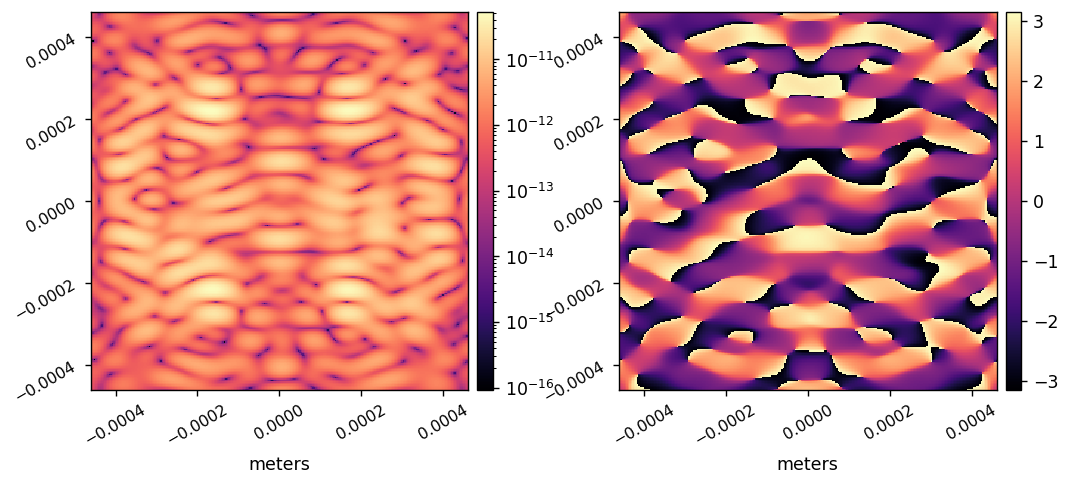

In [29]:
reload(spc)

wavelength = None
npsf = 256
psf_pixelscale=3.6e-6*u.m/u.pix

use_opds = False

psf, wfs = spc.run(wavelength=wavelength, npsf=npsf, psf_pixelscale=psf_pixelscale,
                   dm1=np.zeros((48,48)), dm2=np.zeros((48,48)), 
                   use_opds=use_opds, use_pupil_defocus=True,
                   polaxis=10,
                   cgi_dir=cgi_dir,
                   display_mode=False, display_intermediates=False, return_intermediates=True,
                   quiet=False,)

misc.myimshow2(wfs[-1].intensity, wfs[-1].phase, lognorm1=True,
               pxscl1=psf_pixelscale, pxscl2=psf_pixelscale,)

In [31]:
len(wfs)

30

In [67]:
save_waves(wfs, wf_dir, use_opds=use_opds)

Saving wavefronts: 
0 Saved polmap wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/polmap_poppy.fits
1 Saved primary wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/primary_poppy.fits
2 Saved secondary wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/secondary_poppy.fits
3 Saved poma_fold wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/poma_fold_poppy.fits
4 Saved m3 wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/m3_poppy.fits
5 Saved m4 wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/m4_poppy.fits
6 Saved m5 wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/m5_poppy.fits
7 Saved tt_fold wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/tt_fold_poppy.fits
8 Saved fsm wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/fsm_poppy.fits
9 Saved oap1 wavefront to /groups/douglase/kians-data-files/roman-cgi-wfs/hlc/oap1_poppy.fits
10 Saved focm wave

In [ ]:
import proper
import roman_phasec_proper

cor_type='spc-spec'
lambda_m=730e-9
final_sampling_lam0=0.1
output_dim=256
source_x_offset=0
source_y_offset=0
use_fpm=1
use_errors=0
if use_errors==0: use_lens_errors=0
else: use_lens_errors=1
use_dm1=0
use_dm2=0
dm1_fname='spc_spec_best_contrast_dm1.fits'
dm2_fname='spc_spec_best_contrast_dm2.fits'
polaxis=0
use_pupil_defocus=1

if use_dm1==0: dm1_m = 0
else: dm1_m = proper.prop_fits_read( roman_phasec_proper.lib_dir + '/examples/' + dm1_fname )
if use_dm2==0: dm2_m = 0
else: dm2_m = proper.prop_fits_read( roman_phasec_proper.lib_dir + '/examples/' + dm2_fname )

lam_array = np.array([lambda_m*1e6])
(wfs_2, wfs_sampling_m) = proper.prop_run_multi('roman_phasec', lam_array, output_dim, QUIET=False, 
                                                PASSVALUE={'cor_type':cor_type,
                                                           'final_sampling_lam0':final_sampling_lam0, 
                                                           'source_x_offset':source_x_offset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_lens_errors':use_lens_errors,
                                                           'use_pupil_defocus':use_pupil_defocus,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1_m, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2_m,
                                                           'polaxis':polaxis,
                                                          })
clear_output()

proper_psf = wfs_2[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

misc.myimshow2(np.abs(proper_psf)**2, np.angle(proper_psf), lognorm1=True,
               pxscl1=psf_sampling_m, pxscl2=psf_sampling_m,)

Lambda = 7.3000E-07   Throughput = 1.00


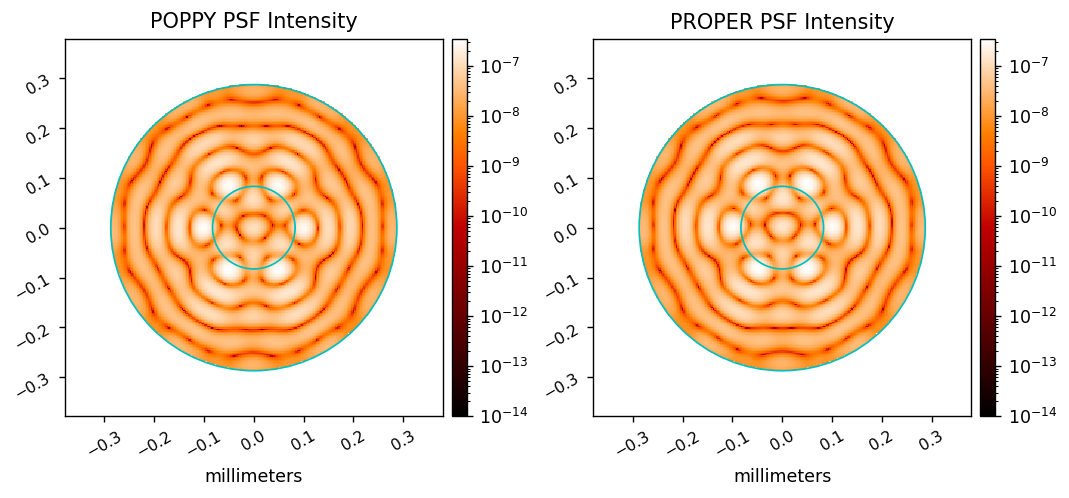

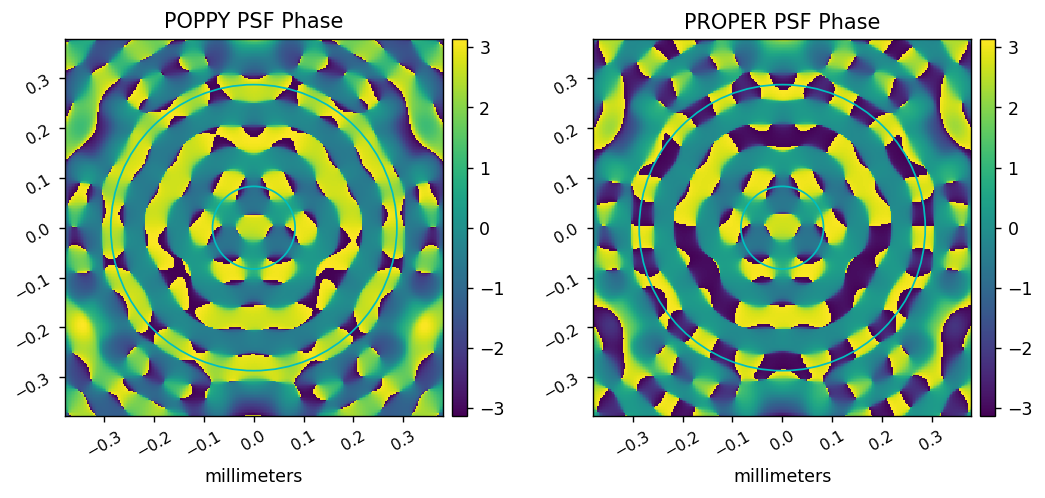

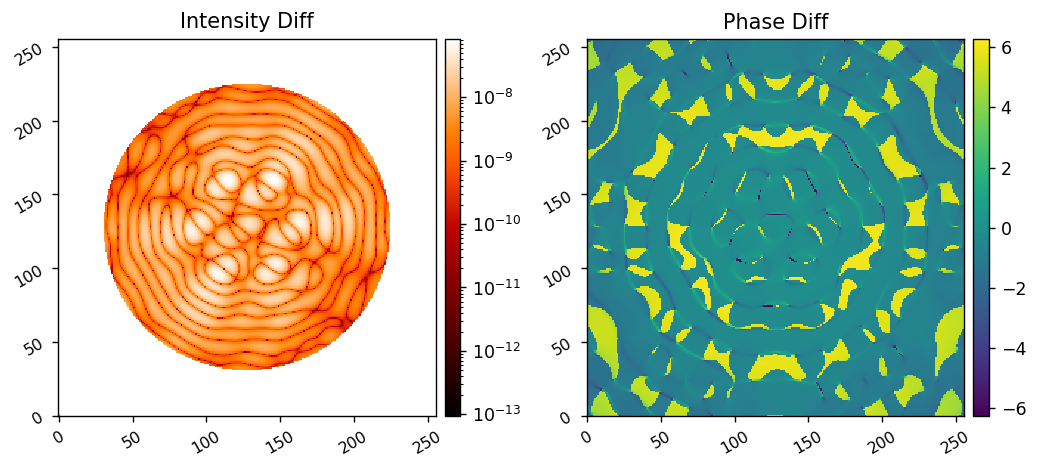

7.48083828528617e-09
0.0008990307793052737
0.0009408500185010579


In [68]:
from scipy.ndimage import rotate
from matplotlib.patches import Circle

pop_int = rotate(wfs[-1].intensity, 180)
pop_phs = rotate(wfs[-1].phase, 180)
prop_int = np.abs(proper_psf)**2
prop_phs = np.angle(proper_psf)

pop_int = misc.mask_psf(pop_int, pixelscale=psf_sampling_m.value, pixelscale_lamD=0.1, iwa=None, owa=9.7)
prop_int = misc.mask_psf(prop_int, pixelscale=psf_sampling_m.value, pixelscale_lamD=0.1, iwa=None, owa=9.7)

psfs = np.ma.concatenate([pop_int, prop_int])
vmin = np.ma.min(psfs)
vmax = np.ma.max(psfs)
vmin = 1e-14

innwa = 2.8/final_sampling_lam0*psf_sampling_m.value * 1000 # inner and outer working angles in units of m
outwa = 9.7/final_sampling_lam0*psf_sampling_m.value * 1000

patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow2(pop_int, prop_int, 'POPPY PSF Intensity', 'PROPER PSF Intensity',
               cmap1='gist_heat', cmap2='gist_heat', 
               lognorm1=True, lognorm2=True, vmin1=vmin, vmax1=vmax, vmin2=vmin, vmax2=vmax,
               pxscl1=psf_pixelscale.to(u.mm/u.pix), pxscl2=psf_sampling_m.to(u.mm/u.pix),
               patches1=patches1, patches2=patches2)

patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow2(pop_phs, prop_phs, 'POPPY PSF Phase', 'PROPER PSF Phase',
               pxscl1=psf_pixelscale.to(u.mm/u.pix), pxscl2=psf_sampling_m.to(u.mm/u.pix),
               cmap1='viridis', cmap2='viridis', patches1=patches1, patches2=patches2)

# Difference
int_diff = np.abs(pop_int-prop_int)
phs_diff = pop_phs-prop_phs
# int_diff = pop_int/prop_int
# phs_diff = pop_phs/prop_phs
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
misc.myimshow2(int_diff, phs_diff, 'Intensity Diff', 'Phase Diff',
               pxscl=psf_sampling_m.to(u.mm/u.pix),
               lognorm1=True, 
               cmap1='gist_heat', cmap2='viridis',  
               patches1=patches1, patches2=patches2)
print(np.ma.mean(int_diff))
print(np.ma.sum(pop_int))
print(np.ma.sum(prop_int))